In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmean_from_scratch import My_KMeans
from utils import (
    get_new_shape,
    reconstruct,
    visualize_img,
    visualize_comparison
)
from config import MAX_POINT

# Load + visualize original image

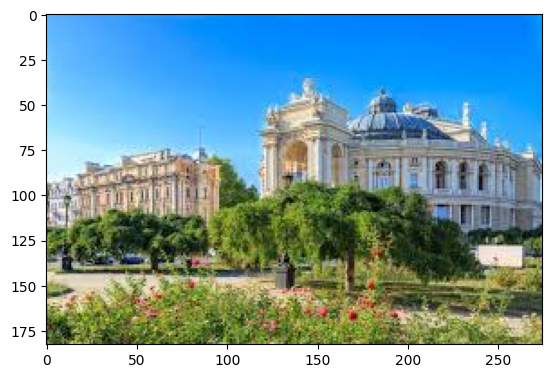

In [2]:
img = cv2.imread("odessa.jpeg")
visualize_img(img)

# Process image

In [3]:
high, width = img.shape[0], img.shape[1]
new_high, new_width = get_new_shape(high, width, MAX_POINT)
resized_img = cv2.resize(img, (new_width, new_high))
img_float = resized_img / 255.0
flatten_img_float = img_float.reshape(-1, 3)

In [4]:
# Arrays to store results
n_clusters_list = []
distances_sklearn = []
distances_custom = []
exec_times_sklearn = []
exec_times_custom = []

# Visualize result image + compare custom vs sklearn implementation

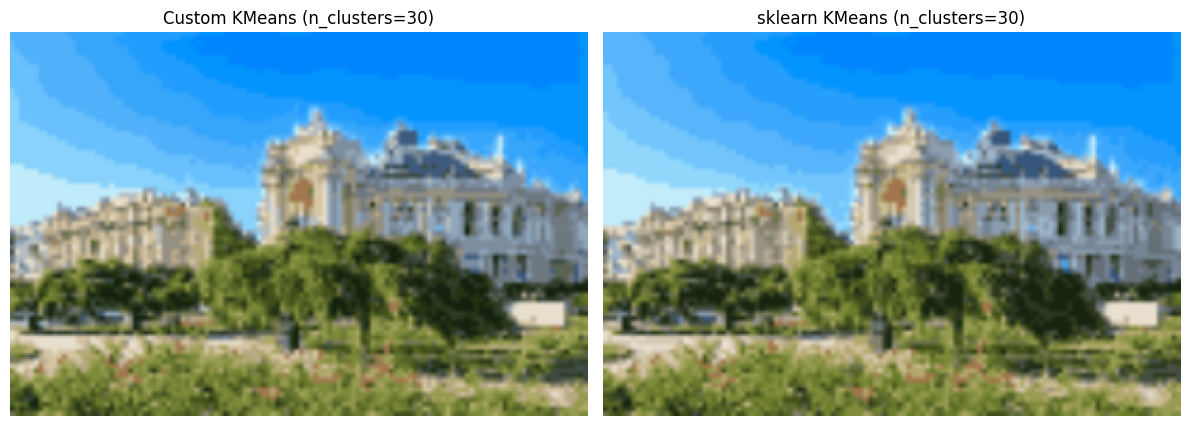

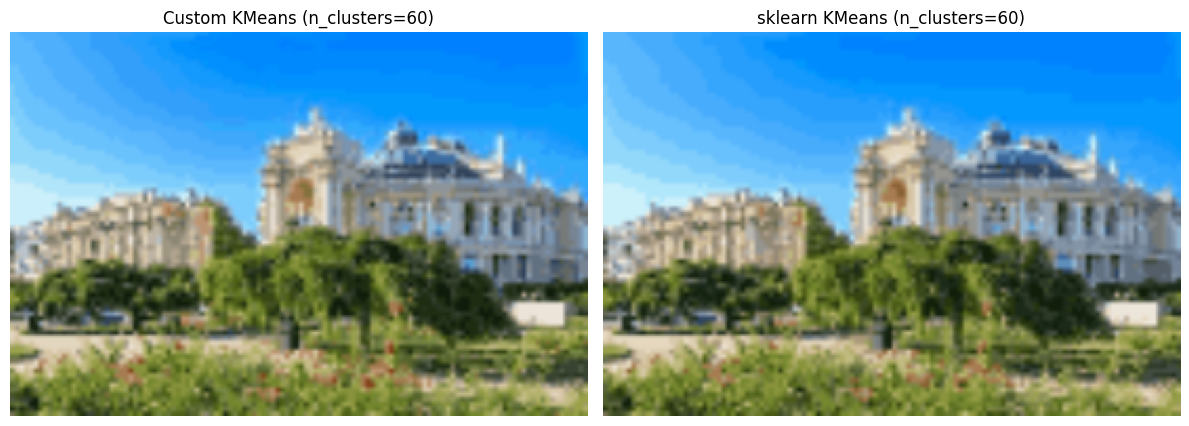

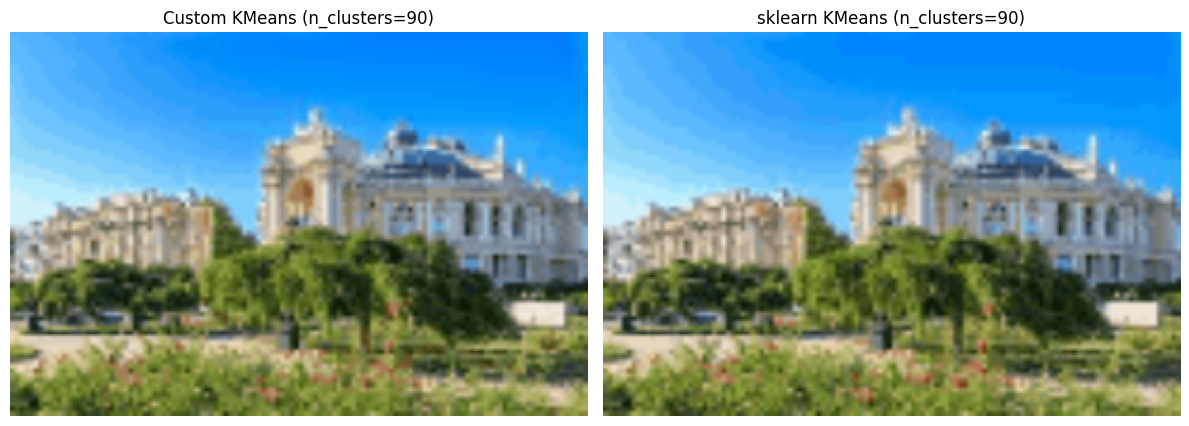

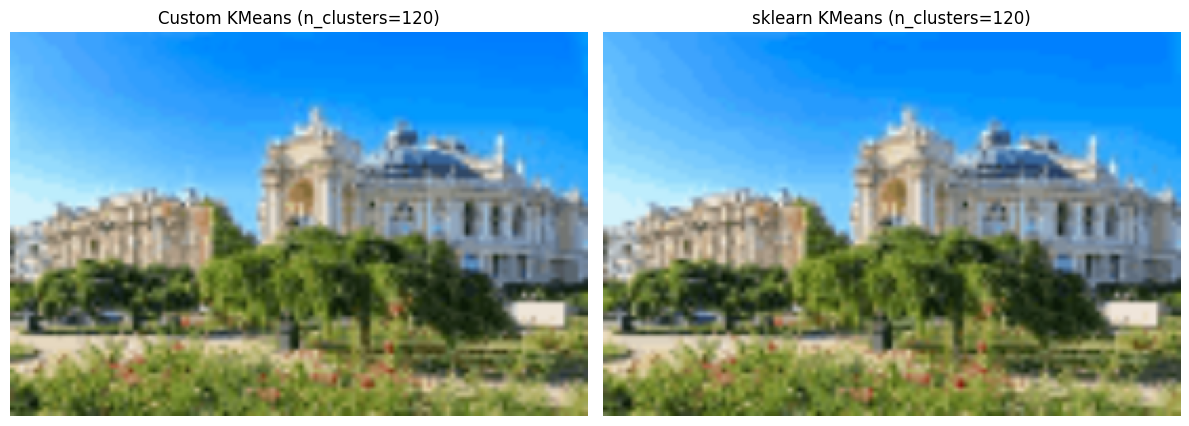

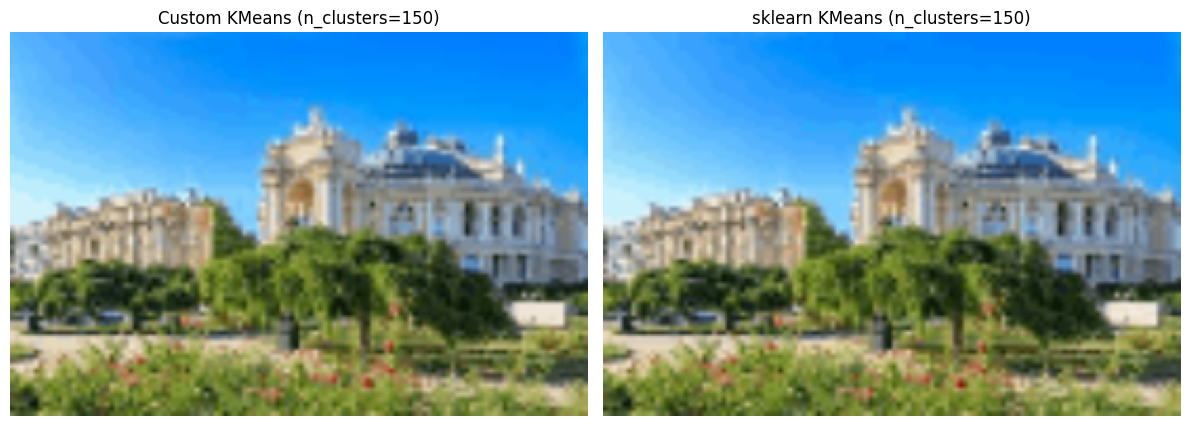

In [5]:
# Loop to compare different n_clusters
for i in range(5):
    n_cluster = (i+1)*30
    n_clusters_list.append(n_cluster)

    # Cluster with sklearn KMeans
    kmeans = KMeans(n_clusters=n_cluster)
    start = time.time()
    kmeans.fit(flatten_img_float)
    exec_time_1 = time.time() - start
    exec_times_sklearn.append(exec_time_1)
    img_hat = kmeans.cluster_centers_[kmeans.labels_]
    distances1 = np.mean(np.linalg.norm(img_hat - flatten_img_float, axis=1))
    distances_sklearn.append(distances1)
    img_hat = reconstruct(img_hat, new_high, new_width)
    origin_img_hat_sklearn = cv2.resize(img_hat, (width, high))

    # Cluster with custom KMeans
    kmeans = My_KMeans(n_clusters=n_cluster)
    start = time.time()
    kmeans.fit(flatten_img_float)
    exec_time_2 = time.time() - start
    exec_times_custom.append(exec_time_2)
    img_hat = kmeans.cluster_centers_[kmeans.labels_]
    distances2 = np.mean(np.linalg.norm(img_hat - flatten_img_float, axis=1))
    distances_custom.append(distances2)
    img_hat = reconstruct(img_hat, new_high, new_width)
    origin_img_hat_custom = cv2.resize(img_hat, (width, high))
    
    # Visualize comparison (if needed)
    visualize_comparison(origin_img_hat_custom, origin_img_hat_sklearn, n_cluster)

# Compare 2 implementation

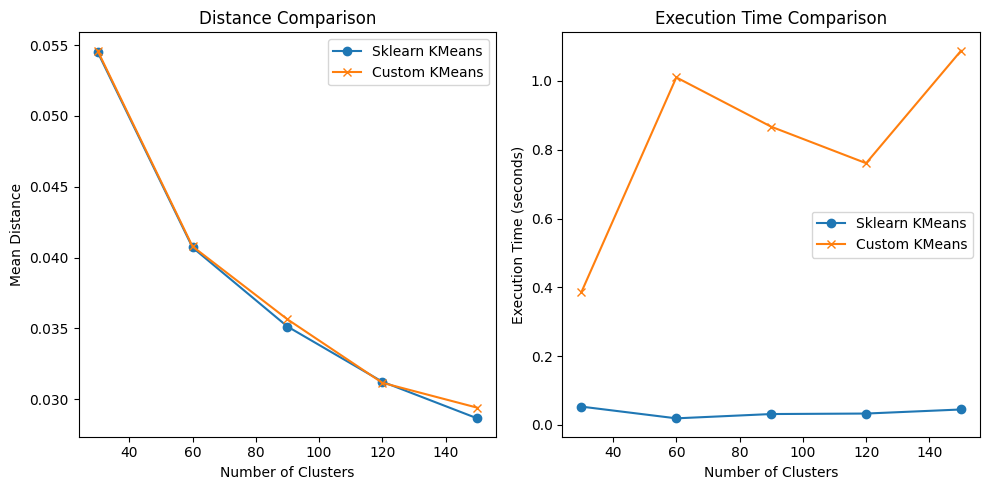

In [6]:
# Plot distance vs n_clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_list, distances_sklearn, label='Sklearn KMeans', marker='o')
plt.plot(n_clusters_list, distances_custom, label='Custom KMeans', marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Distance')
plt.title('Distance Comparison')
plt.legend()

# Plot execution time vs n_clusters
plt.subplot(1, 2, 2)
plt.plot(n_clusters_list, exec_times_sklearn, label='Sklearn KMeans', marker='o')
plt.plot(n_clusters_list, exec_times_custom, label='Custom KMeans', marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()

plt.tight_layout()
plt.show()